In [1]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


In [2]:
prog_file = scipy.io.netcdf_file('example_data/WOA13_annual_SST_nc3_classic.nc')
prog_file.variables

OrderedDict([('lat', <scipy.io.netcdf.netcdf_variable at 0x10c9f9550>),
             ('lon', <scipy.io.netcdf.netcdf_variable at 0x10c9f9590>),
             ('tos', <scipy.io.netcdf.netcdf_variable at 0x10c9f95d0>)])

In [3]:
# creating dictionary of data so that it's easy to iterate through
data = {}
data['lat'] = prog_file.variables['lat']
data['lon'] = prog_file.variables['lon']
data['tos'] = prog_file.variables['tos']
lat = data['lat']
lon = data['lon']
tos = data['tos']

## Attempted Installs

### Attempt 1: Installing via Homebrew
I attempted to use ncdump from the command below to generate the appropriate metadata from command line. However, I ran into quite a bit of trouble trying to install ncdump. Here is a recap of what I went through trying to get these modules to install:

`ncdump -h 'example_data/WOA13_annual_SST_nc3_classic.nc'`

`sudo xcodebuild -license accept` - On my Mac, I had to update xcode because I was trying to use Homebrew to install netcdf.

`brew install netcdf` - using Homebrew here (took a couple of minutes)- ultimately failed. I also tried `brew install netcdf4` and `brew install hdf5`.

Each time I tried installing, I always ran into trouble when Homebrew executed the make file.

### Attempt 2: Installing via Conda
I tried to install netcdf4 to my environment by running the following:
`conda install -n Py2 netcdf4`

While this successfully downloaded, I still had errors when I tried to execute `import netcdf4`- no module named netCDF4

Googling and looking at StackOverflow suggested that this might be because my numpy was outdated. However even after updating conda and numpy, it still didn't work.

### Attempt 3: Directly cloning from GitHub

Didn't work for me: https://github.com/Unidata/netcdf4-python

### Getting all attributes from each handle
After all the various installs failed, I used the built in `_attributes` method to access all the attributes of each of the variables. Below is the output of all the attributes for lat, lon, and tos.

* Referenced: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.netcdf.netcdf_variable.html
The documentation mentioned `attributes`, but running `var.attributes` did not work. Is this different from `var._attributes`?

To get all object attributes displayed in full, replace `var._attributes` with `var.__dict__`

In [4]:
for item in data:
    var = data[item]
    print("Variable name:", item)
    print(var._attributes)
    print("################################################################################")

('Variable name:', 'lat')
OrderedDict([('standard_name', 'latitude'), ('long_name', 'latitude'), ('units', 'degrees_north'), ('axis', 'Y'), ('bounds', 'lat_bnds')])
################################################################################
('Variable name:', 'tos')
OrderedDict([('standard_name', 'sea_surface_temperature'), ('long_name', 'Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.'), ('coordinates', 'time lat lon depth'), ('cell_methods', 'area: mean depth: mean time: mean'), ('grid_mapping', 'crs'), ('units', 'degrees_celsius'), ('_FillValue', 9.96921e+36)])
################################################################################
('Variable name:', 'lon')
OrderedDict([('standard_name', 'longitude'), ('long_name', 'longitude'), ('units', 'degrees_east'), ('axis', 'X'), ('bounds', 'lon_bnds')])
################################################################################


## Variable Metadata
The metadata is "data that provides other information about other data". In this case the metadata for each latitude, longitude, and sea surface temperature is listed under each of them below. We see that the metadata gives us specific attributes of these variables that we can then access. From the metadata, we are able to get more specific information about the variables. For example, we see that sea surface temperature has coordinates measured in time, latitude, longitude, and depth. 

### Latitude (lat)
- standard_name: latitude
- long_name: latitude
- units: degrees_north
- axis: Y
- bounds: lat_bnds

### Longitude (lon)
- standard_name: longitude
- long_name: longitude
- units: degrees_east
- axis: X
- bounds: lon_bnds

### Sea Surface Temperature (tos)
- standard_name: sea_surface_temperature
- long_name: Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
- coordinates: time lat lon depth
- cell_methods: 
  * area: mean depth
  * mean time: mean
- grid_mapping: crs
- units: degrees_celsius
- _fillValue: 9.96921e+36

We will include some examples of accessing various variable metadata below:

In [6]:
print('Sea Surface Temperature units: ', tos.units)
print('Sea Surface Temperature coordinates: ', tos.coordinates)
print('Latitude axis: ', lat.axis)
print('Longitude axis: ', lon.axis)

('Sea Surface Temperature units: ', 'degrees_celsius')
('Sea Surface Temperature coordinates: ', 'time lat lon depth')
('Latitude axis: ', 'Y')
('Longitude axis: ', 'X')


We can similarly access other metadata by calling any of the other attributes listed above for the appropriate variable. 

## Plotting Sea Surface Temperature

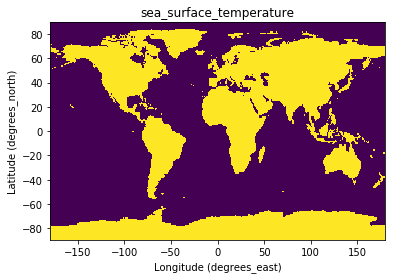

In [12]:
# Because tos_handle itself is a netcdf_variable object, we perform an array slice to get its array value for plotting.
print(tos)
plt.pcolormesh( lon[:], lat[:], tos[:] )
plt.title(tos.standard_name);
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);

In the plot above, we see that sea surface temperature was colored yellow for the land masses. Because sea surface temperature is irrelevant to our land masses (as indicated by the `_fillValue`), we will mask the hidden values and plot the map again so that the coloring excludes the continents.

In [13]:
# helper function for masking arrays with missing values
def maskArray(handle):
    return numpy.ma.array(handle[:], mask=(handle[:] == handle._FillValue))

In [15]:
masked = maskArray(tos)

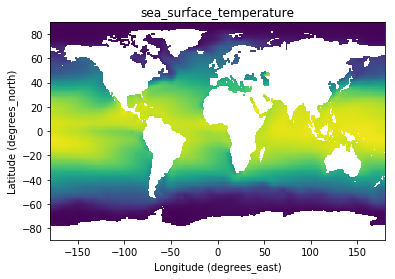

In [16]:
plt.pcolormesh( lon[:], lat[:], masked )
plt.title(tos.standard_name);
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);

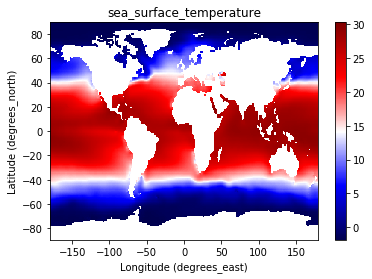

In [18]:
plt.pcolormesh( lon[:], lat[:], masked, cmap=cm.seismic ); plt.colorbar();
plt.title(tos.standard_name);
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);

In [19]:
[masked.min(), masked.max()]

[-1.85861, 30.27291]

In [20]:
import ipywidgets

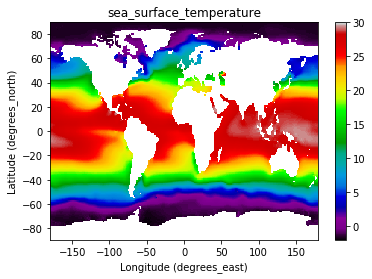

In [22]:
def plot_tos(data):
#     plt.pcolormesh( ssh_handle[record], cmap=cm.spectral )
    plt.pcolormesh( lon[:], lat[:], data, cmap=cm.spectral )
    plt.clim(-2, 30) # Fixed scale here based on above output
    plt.colorbar()
    plt.title(tos.standard_name);
    plt.xlabel('Longitude (%s)' %lon.units);
    plt.ylabel('Latitude (%s)' %lat.units);

# ipywidgets.interact(plot_ssh, record=(0,ssh_handle.shape[0]-1));
ipywidgets.interact(plot_tos(masked));